<a href="https://colab.research.google.com/github/MrSudhish/training-colab/blob/main/11%7C%7C_Types_of_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Types Of Recurrent Neural Networks
## 1. One-to-One RNN
* It is used for straightforward classification tasks such as binary classification where no sequential data is involved.
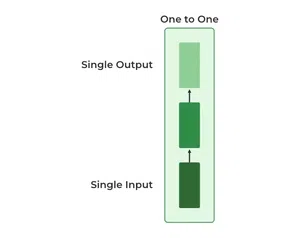

## 2. One-to-Many RNN
* Useful in tasks where one input triggers a sequence of predictions (outputs).
* In image captioning a single image can be used as input to generate a sequence of words as a caption.
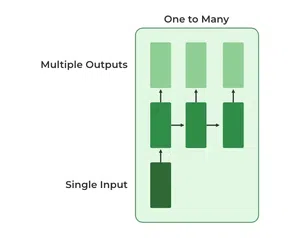

In [ ]:
!pip install transformers pillow torch torchvision --quiet

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image
import matplotlib.pyplot as plt
import requests
import io
import base64
from google.colab import files

In [ ]:
model_id = "nlpconnect/vit-gpt2-image-captioning"

In [ ]:
model = VisionEncoderDecoderModel.from_pretrained(model_id)
feature_extractor = ViTImageProcessor.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (inte

Saving OIP (2).jpeg to OIP (2).jpeg


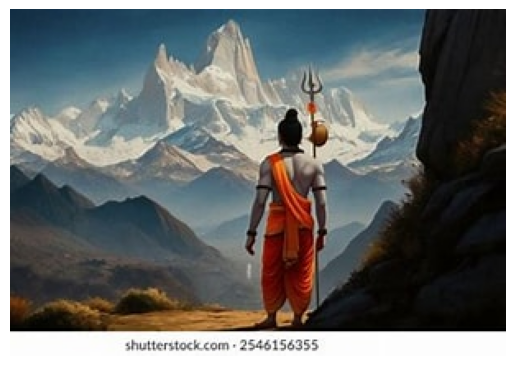


🖼️ Generated Caption:
→ a woman standing on top of a mountain with mountains 


In [ ]:
uploaded = files.upload()
image = Image.open(list(uploaded.keys())[0])
# --- Display image ---
plt.imshow(image)
plt.axis("off")
plt.show()

# --- Generate caption ---
pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values.to(device)
generated_ids = model.generate(pixel_values, max_length=20, num_beams=4)
generated_caption = tokenizer.decode(generated_ids[0], skip_special_tokens=True)

print("\n🖼️ Generated Caption:")
print("→", generated_caption)

# 3. Many-to-One RNN
* This type is useful when the overall context of the input sequence is needed to make one prediction.
* sentiment analysis the model receives a sequence of words (like a sentence) and produces a single output like positive, negative or neutral.
  
  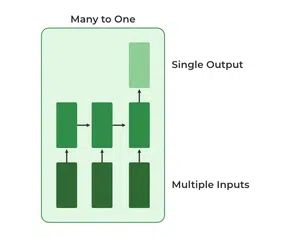

# Backpropagation Through Time (BPTT)

1. **Standard Backprop**: "I made a mistake. Let me tweak my weights based on the input I just saw."
2. **BPTT**: "I made a mistake. Let me tweak my weights based on the input I just saw, AND the inputs I saw 5 steps ago, AND 10 steps ago..."

### 3. The 3-Step Process
BPTT happens in a cycle, just like standard training, but with the added dimension of time.

#### Step 1: Forward Pass (The Prediction)
The network runs through the entire sequence (e.g., the whole sentence) from start to finish.
* Input at $t_1$ $\rightarrow$ Hidden State $1$
* Input at $t_2$ + Hidden State $1$ $\rightarrow$ Hidden State $2$
* ...until the end.
* It calculates an output (prediction) at each step (or just at the end).

#### Step 2: Loss Calculation (The Error)
We compare the predicted output to the actual target.
* **Total Loss:** The sum of the errors at every single time step.
    $$Loss_{total} = Loss_1 + Loss_2 + ... + Loss_t$$

#### Step 3: Backward Pass (The Learning)
This is the "Through Time" part.
1.  We calculate the gradient (the direction to adjust weights) starting at the **last** time step.
2.  We propagate that error back to the previous time step, then the one before that, and so on, all the way to $t=0$.
3.  **Crucial Point:** Because the *same* weights are shared across all time steps (it's the same network, just reused), we sum up the gradients from every time step to make one big update to the weights.



# 2. Bidirectional RNNs
* Traditional feedforward neural networks **which process inputs as fixed-length vectors**, RNNs can manage **variable-length sequences by maintaining a hidden state that stores information from previous steps in the sequence**.
* Traditional RNNs face **challenges such as the vanishing gradient problem where gradients become too small during backpropagation** making training difficult.
* An extension of the **traditional RNN that processes sequential data in both forward and backward directions**.
* Network to **utilize both past and future context** when making predictions providing a more comprehensive understanding of the sequence.

* BRNN moves forward through the sequence, **updating the hidden state based on the current input** and the **prior hidden state at each time step**.
* BRNN also has a **backward hidden layer which processes the sequence in reverse**, updating the **hidden state based on the current input and the hidden state of the next time step**.
* the two hidden layers i.e **forward and backward complement each other** and **predictions are made using the combined outputs of both layers**.

# "I like apple. It is very healthy."
* unidirectional **RNN the network might struggle to understand whether "apple" refers to the fruit** or the company based on the first sentence.
* processing the sentence in both directions, it can easily understand that "apple" refers to the fruit, **thanks to the future context provided by the second sentence ("It is very healthy.")**.

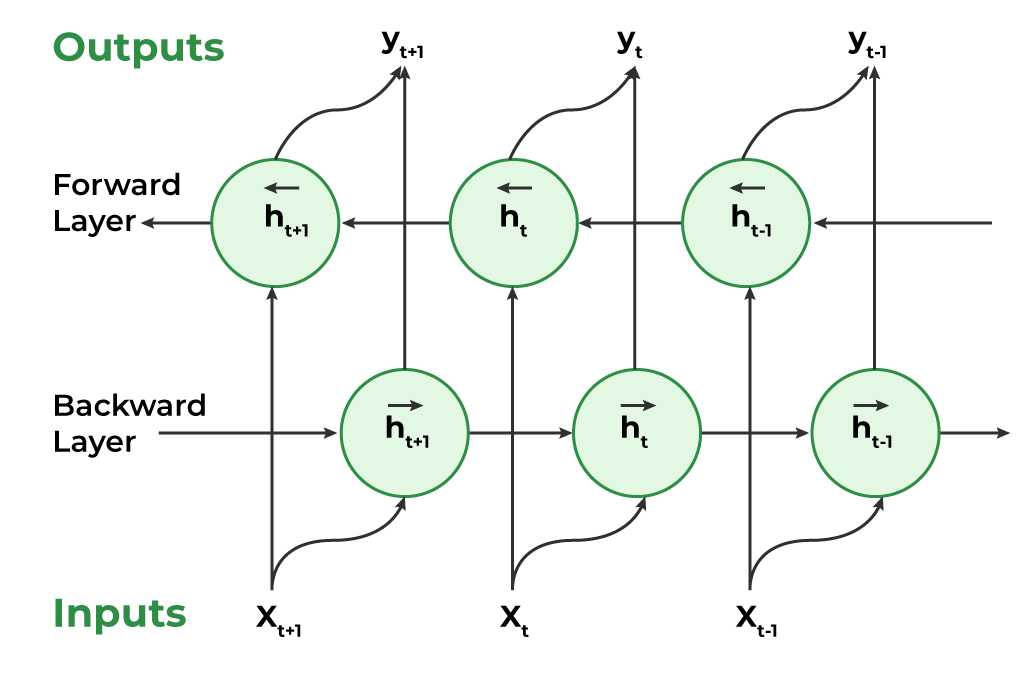

# **Working of Bidirectional Recurrent Neural Networks (BRNNs)**
1. Inputting a Sequence:
2. Dual Processing: BRNNs process data in two directions:
  * **Forward direction:** The hidden state at each time step is **determined by the current input and the previous hidden state**.
  * **Backward direction:** The hidden state at each time step is **influenced by the current input and the next hidden state**.

  3. Computing the Hidden State
  4. Determining the Output

In [ ]:
import torch
import torch.nn as nn
class TransparentLSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(TransparentLSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Dimensions: (Input + Hidden) -> Hidden
        self.W_f = nn.Linear(input_size + hidden_size, hidden_size) # Forget Gate
        self.W_i = nn.Linear(input_size + hidden_size, hidden_size) # Input Gate
        self.W_c = nn.Linear(input_size + hidden_size, hidden_size) # Candidate Memory
        self.W_o = nn.Linear(input_size + hidden_size, hidden_size) # Output Gate

    def forward(self, x, h_prev, c_prev):
      combined = torch.cat((x, h_prev), dim=1)

      # Step 2: Calculate the GATES (The "Brains" of the operation)
      f_gate = torch.sigmoid(self.W_f(combined)) # Forget Gate
      i_gate = torch.sigmoid(self.W_i(combined)) # Input Gate
      o_gate = torch.sigmoid(self.W_o(combined)) # Output Gate

      c_candidate = torch.tanh(self.W_c(combined))

      # Step 4: Update the Long-Term Memory (Cell State)
        # This is the crucial line:
        # (Forget * Old Memory) + (Input * New Info)
      c_next = (f_gate * c_prev) + (i_gate * c_candidate)

      h_next = o_gate * torch.tanh(c_next)
      return h_next, c_next, f_gate, i_gate


In [ ]:
sentence = "The movie was terrible but the acting was great".split()
vocab = {word: i for i, word in enumerate(set(sentence))}
embed_dim = 4
hidden_dim = 4

In [ ]:
embeddings = nn.Embedding(len(vocab), embed_dim)

In [ ]:
lstm_cell = TransparentLSTMCell(embed_dim, hidden_dim)

In [ ]:
h = torch.zeros(1, hidden_dim)
c = torch.zeros(1, hidden_dim)

In [ ]:
print(f"{'WORD':<10} | {'FORGET GATE':<12} | {'INPUT GATE':<12} | {'ACTION EXPLANATION'}")
print("-" * 65)
for word in sentence:
    # 1. Get the word vector
    word_idx = torch.tensor([vocab[word]])
    x = embeddings(word_idx)

    # 2. Run one step of the LSTM
    h, c, f_gate, i_gate = lstm_cell(x, h, c)

    # 3. Analyze the Gates (We take the average value for simplicity)
    # value close to 0 = closed/forget, value close to 1 = open/remember
    f_val = f_gate.mean().item()
    i_val = i_gate.mean().item()

    # 4. Generate a simple text explanation based on values
    # (Note: Since weights are random, this is just for demo visualization)
    explanation = ""
    if f_val < 0.5:
        explanation += "Dropping old info. "
    else:
        explanation += "Keeping context. "

    if i_val > 0.5:
        explanation += "Learning this word."
    else:
        explanation += "Ignoring this word."
    # 5. Print the status
    print(f"{word:<10} | {f_val:.4f}       | {i_val:.4f}       | {explanation}")

WORD       | FORGET GATE  | INPUT GATE   | ACTION EXPLANATION
-----------------------------------------------------------------
The        | 0.3804       | 0.5305       | Dropping old info. Learning this word.
movie      | 0.4974       | 0.4548       | Dropping old info. Ignoring this word.
was        | 0.5249       | 0.5096       | Keeping context. Learning this word.
terrible   | 0.5223       | 0.5375       | Keeping context. Learning this word.
but        | 0.5428       | 0.5172       | Keeping context. Learning this word.
the        | 0.4814       | 0.4412       | Dropping old info. Ignoring this word.
acting     | 0.4449       | 0.5156       | Dropping old info. Learning this word.
was        | 0.5236       | 0.5024       | Keeping context. Learning this word.
great      | 0.4802       | 0.5044       | Dropping old info. Learning this word.


#Encoder and Decoder
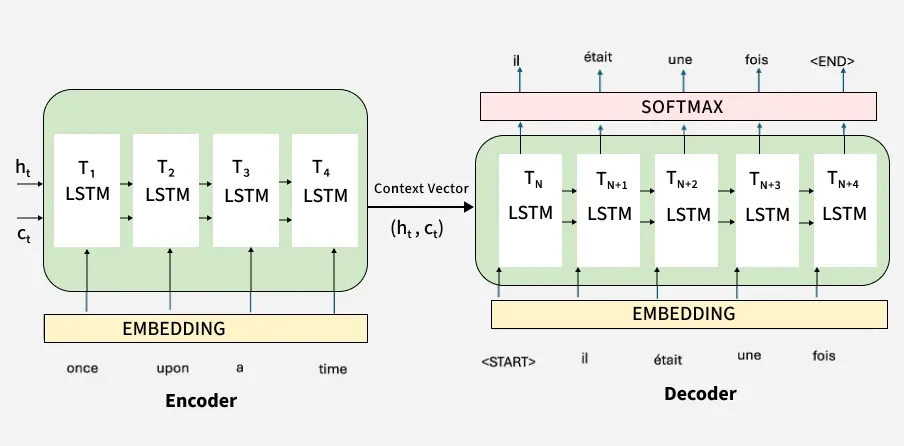

#English → French translation using Encoder–Decoder with Attention

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Dot, Activation, Concatenate

In [ ]:
sentences = [
    "I love deep learning",
    "Deep learning loves me",
    "I love NLP and deep learning"
]

In [ ]:
tokenizer = Tokenizer(num_words=10, oov_token="<OOV>")

In [ ]:
tokenizer.fit_on_texts(sentences)

In [ ]:
word_index = tokenizer.word_index
print("Word Index (word → integer):")
print(word_index)

Word Index (word → integer):
{'<OOV>': 1, 'deep': 2, 'learning': 3, 'i': 4, 'love': 5, 'loves': 6, 'me': 7, 'nlp': 8, 'and': 9}


In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
print("\nSequences (text → integers):")
print(sequences)


Sequences (text → integers):
[[4, 5, 2, 3], [2, 3, 6, 7], [4, 5, 8, 9, 2, 3]]


In [ ]:
padded = pad_sequences(sequences, padding='post')  # or 'pre'
print("\nPadded Sequences:")
print(padded)


Padded Sequences:
[[4 5 2 3 0 0]
 [2 3 6 7 0 0]
 [4 5 8 9 2 3]]


In [ ]:
padded = pad_sequences(sequences, padding='post')  # or 'pre'
print("\nPadded Sequences:")
print(padded)


Padded Sequences:
[[4 5 2 3 0 0]
 [2 3 6 7 0 0]
 [4 5 8 9 2 3]]
